In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


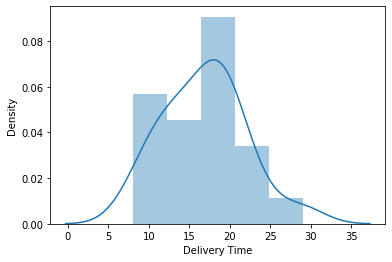

In [4]:
sns.distplot(dataset['Delivery Time'])

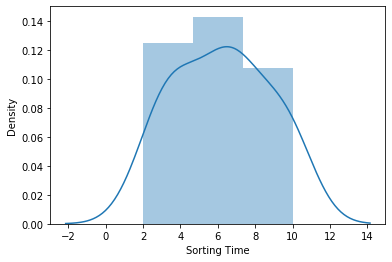

In [5]:
sns.distplot(dataset['Sorting Time'])

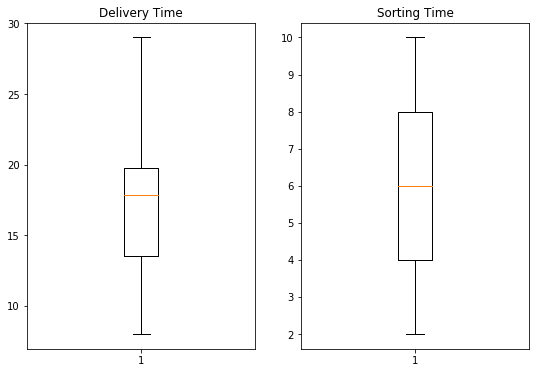

In [6]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dataset['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(dataset['Sorting Time'])
plt.title('Sorting Time')
plt.show()

In [7]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


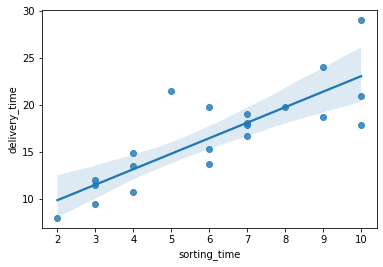

In [9]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

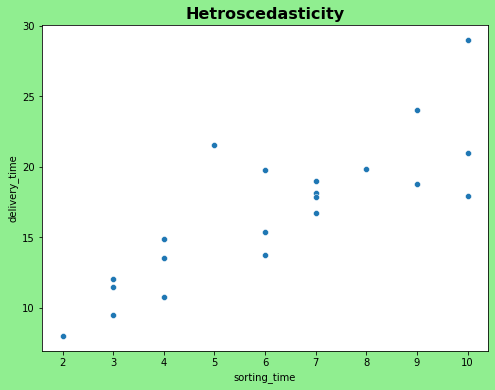

In [14]:
#Checking for Homoscedasticity or Hetroscedasticity
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = dataset['sorting_time'], y = dataset['delivery_time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [15]:
dataset.var()

delivery_time    25.754619
sorting_time      6.461905
dtype: float64

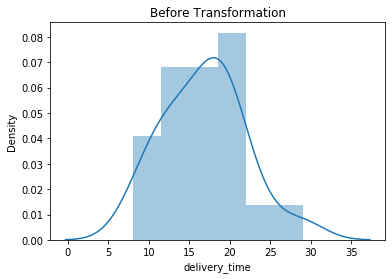

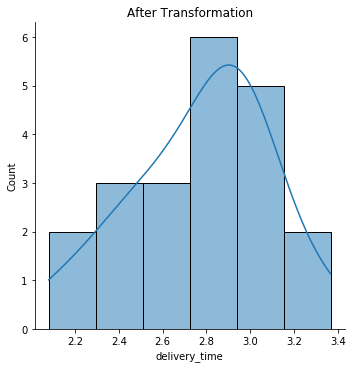

In [17]:
#Trying different transformation of data to estimate normal distribution and to remove any skewness
sns.distplot(dataset['delivery_time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dataset['delivery_time']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

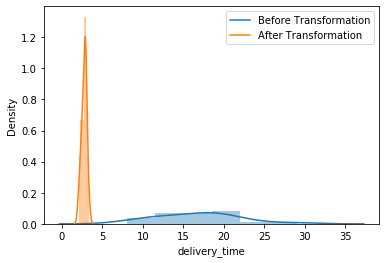

In [18]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset['delivery_time'], bins = 6, kde = True)
sns.distplot(np.log(dataset['delivery_time']), bins = 6, kde = True)
plt.legend(labels)
plt.show()

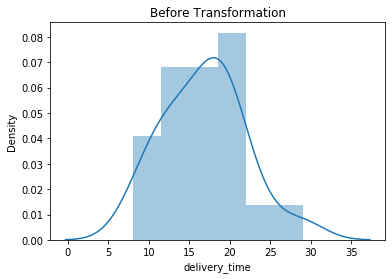

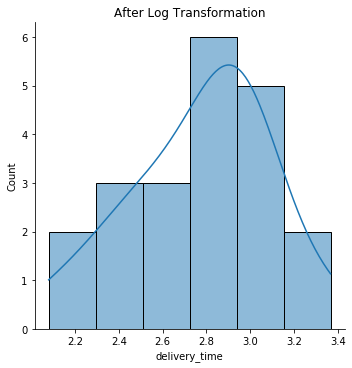

In [21]:
sns.distplot(dataset['delivery_time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dataset['delivery_time']), bins = 6, kde = True)
plt.title('After Log Transformation')
plt.show()

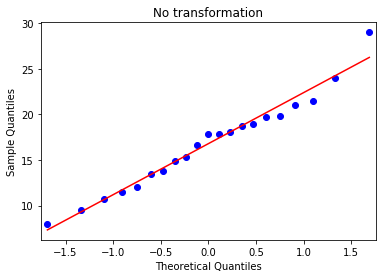

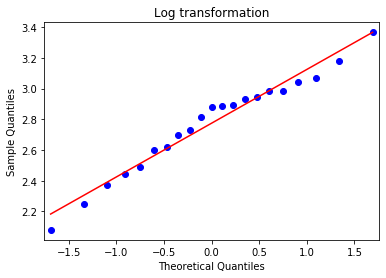

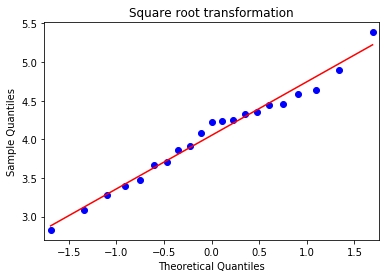

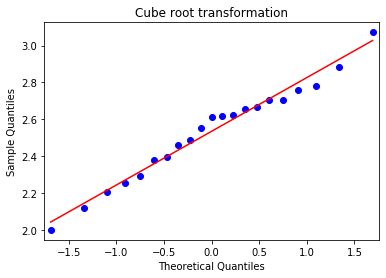

In [24]:
smf.qqplot(dataset['delivery_time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset['delivery_time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset['delivery_time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset['delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [25]:
model=sm.ols("delivery_time~sorting_time",data=dataset).fit()  #Model Building

In [26]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [27]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [28]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        13:41:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Square Root transformation on data
square_root_model = sm.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = dataset).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Sun, 21 Jan 2024   Prob (F-statistic):           8.48e-07
Time:                            13:43:39   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#Cube Root transformation on Data
cube_root_model = sm.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = dataset).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Sun, 21 Jan 2024   Prob (F-statistic):           4.90e-07
Time:                            13:53:37   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Log transformation on Data
log_model = sm.ols('np.log(delivery_time)~np.log(sorting_time)', data = dataset).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 21 Jan 2024   Prob (F-statistic):           1.60e-07
Time:                           13:54:35   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

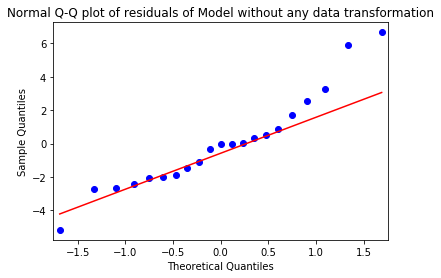

In [36]:
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

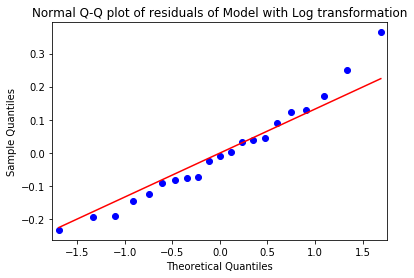

In [37]:
sm.qqplot(log_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

In [38]:
#Residual Plot to check Homoscedasticity or Hetroscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

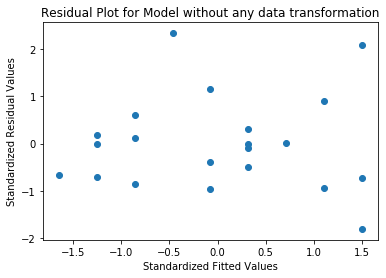

In [39]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

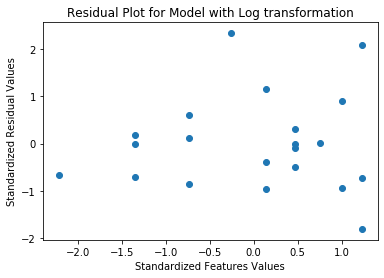

In [42]:
plt.scatter(get_standardized_values(log_model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
square_root_pred_y =np.square(square_root_model.predict(dataset['sorting_time']))
cube_root_pred_y =pow(cube_root_model.predict(dataset['sorting_time']),3)
log_model_pred_y =np.exp(log_model.predict(dataset['sorting_time']))

In [45]:
square_root_rmse =np.sqrt(mean_squared_error(dataset['delivery_time'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(dataset['delivery_time'], cube_root_pred_y))
log__rmse =np.sqrt(mean_squared_error(dataset['delivery_time'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=', cube_root_rmse,'\n' 'log_model=', log__rmse)

model= 2.9349037688901394 
square_root_model= 2.762294279320867 
cube_root_model= 2.755584309893574 
log_model= 2.7458288976145497


In [46]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'log_model'

In [48]:
#Predicting values from Model with Log Transformation on the Data
predicted = pd.DataFrame()
predicted['sorting_time'] = dataset.sorting_time
predicted['delivery_time'] = dataset.delivery_time
predicted['Predicted_delivery_time'] = pd.DataFrame(np.exp(log_model.predict(predicted.sorting_time)))
predicted

,sorting_time,delivery_time,Predicted_delivery_time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [49]:
# Predicitng from Original Model without any data transformation
predicted1 = pd.DataFrame()
predicted1['sorting_time'] = dataset.sorting_time
predicted1['delivery_time'] = dataset.delivery_time
predicted1['Predicted_delivery_time'] = pd.DataFrame(model.predict(predicted1.sorting_time))
predicted1

,sorting_time,delivery_time,Predicted_delivery_time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
